MNIST

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
(train_X,train_y),(test_X,test_y)=mnist.load_data()

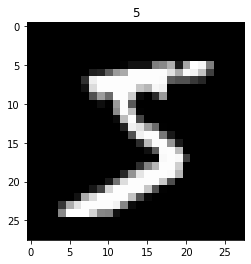

In [3]:
plt.imshow(train_X[0],cmap='gray')
plt.title(train_y[0])
plt.show()

In [4]:
#each pixel 0-->255
train_X=train_X/255
test_X=test_X/255

In [5]:
train_X[0].shape

(28, 28)

# Model 

In [6]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Reshape,Input

In [7]:
latent_size=32
# Encoder Archeticture
encoder=Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(512)),
encoder.add(Dropout(0.5))
encoder.add(Dense(128)),
encoder.add(Dropout(0.5))
encoder.add(Dense(64))
encoder.add(Dropout(0.5))
encoder.add(Dense(latent_size,activation='sigmoid'))

In [8]:
#Decoder Archeticture
decoder=Sequential()
decoder.add(Dense(64,input_shape=(latent_size,)))
decoder.add(Dropout(0.5))
decoder.add(Dense(128))
decoder.add(Dropout(0.5))
decoder.add(Dense(512))
decoder.add(Dropout(0.5))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape((28,28)))

In [9]:
img=Input(shape=(28,28))
latent_vector=encoder(img)
output=decoder(latent_vector)

In [10]:
model=Model(inputs=img,outputs=output)
model.compile(loss='binary_crossentropy',optimizer='adam')

Train Model and Visualize Result

In [11]:
from IPython import display

1/1 [==============================] - 0s 19ms/step


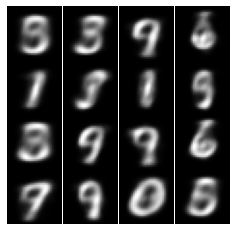

In [13]:
epochs=50


for epoch in range(epochs):

    print("Epoch : ",epoch)
    model.fit(train_X,train_X,batch_size=64)

    fig,axs=plt.subplots(4,4,figsize=(4,4))
    rand=test_X[np.random.randint(0,10000,16)].reshape((4,4,1,28,28))

    display.clear_output()


    for i in range(4):

        for j in range(4):
            axs[i,j].imshow(model.predict(rand[i,j])[0],cmap="gray")

            axs[i,j].axis("off")

    plt.subplots_adjust(wspace=0,hspace=0)
    plt.show()